# Compressed Sensing

In [1]:
import sys
sys.path.insert(0, '../../src_numpy/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_maps import *
from quantum_tools import *
from experiments import *
#np.set_printoptions(threshold=sys.maxsize)

## Check Convergence

In [22]:
n = 3
d = 2**n
rank = 3

input_list = [prepare_input(numberToBase(i, 6, n)) for i in range(6**n)]

np.random.seed(42)
random.seed(42)

X, _, _ = generate_ginibre(d, d)
U = generate_unitary(X)
kraus_target = KrausMap(U, 0.5, d, rank)

target_list = [kraus_target.apply_map(input) for input in input_list]

kraus_model = KrausMap(U, 0.1, d, rank)
model1 = ModelQuantumMap(q_map = kraus_model,
                         input_list = input_list,
                         target_list = target_list,
                         cost = state_density_loss,
                         lr = 0.05, 
                         h = 1e-3)

kraus_model = KrausMap(U, 0.5, d, rank)
model2 = ModelQuantumMap(q_map = kraus_model,
                         input_list = input_list,
                         target_list = target_list,
                         cost = state_density_loss,
                         lr = 0.05, 
                         h = 1e-3)

kraus_model = KrausMap(U, 0.9, d, rank)
model3 = ModelQuantumMap(q_map = kraus_model,
                         input_list = input_list,
                         target_list = target_list,
                         cost = state_density_loss,
                         lr = 0.05, 
                         h = 1e-3)

In [23]:
model1.train(num_iter = 500, 
             use_adam = True)

model2.train(num_iter = 500, 
             use_adam = True)

model3.train(num_iter = 500, 
             use_adam = True)

  0%|          | 0/500 [00:00<?, ?it/s]

0: fid: -0.402, c: 0.105
1: fid: -0.407, c: 0.109
2: fid: -0.413, c: 0.114
3: fid: -0.420, c: 0.119
4: fid: -0.427, c: 0.125
5: fid: -0.434, c: 0.130
6: fid: -0.441, c: 0.136
7: fid: -0.448, c: 0.141
8: fid: -0.456, c: 0.148
9: fid: -0.463, c: 0.154
10: fid: -0.471, c: 0.161
11: fid: -0.478, c: 0.168
12: fid: -0.486, c: 0.175
13: fid: -0.493, c: 0.182
14: fid: -0.501, c: 0.190
15: fid: -0.508, c: 0.198
16: fid: -0.516, c: 0.207
17: fid: -0.524, c: 0.216
18: fid: -0.531, c: 0.225
19: fid: -0.539, c: 0.234
20: fid: -0.547, c: 0.244
21: fid: -0.554, c: 0.254
22: fid: -0.562, c: 0.264
23: fid: -0.570, c: 0.275
24: fid: -0.578, c: 0.285
25: fid: -0.586, c: 0.297
26: fid: -0.593, c: 0.308
27: fid: -0.601, c: 0.319
28: fid: -0.609, c: 0.331
29: fid: -0.616, c: 0.342
30: fid: -0.624, c: 0.354
31: fid: -0.631, c: 0.366
32: fid: -0.639, c: 0.379
33: fid: -0.646, c: 0.391
34: fid: -0.653, c: 0.404
35: fid: -0.660, c: 0.417
36: fid: -0.666, c: 0.429
37: fid: -0.673, c: 0.442
38: fid: -0.679, c: 0.

308: fid: -0.920, c: 0.546
309: fid: -0.920, c: 0.547
310: fid: -0.921, c: 0.547
311: fid: -0.921, c: 0.548
312: fid: -0.921, c: 0.549
313: fid: -0.921, c: 0.550
314: fid: -0.922, c: 0.550
315: fid: -0.922, c: 0.552
316: fid: -0.922, c: 0.553
317: fid: -0.922, c: 0.555
318: fid: -0.922, c: 0.557
319: fid: -0.922, c: 0.558
320: fid: -0.923, c: 0.559
321: fid: -0.923, c: 0.560
322: fid: -0.923, c: 0.560
323: fid: -0.923, c: 0.560
324: fid: -0.923, c: 0.561
325: fid: -0.924, c: 0.561
326: fid: -0.924, c: 0.561
327: fid: -0.924, c: 0.561
328: fid: -0.925, c: 0.560
329: fid: -0.925, c: 0.560
330: fid: -0.926, c: 0.560
331: fid: -0.926, c: 0.560
332: fid: -0.927, c: 0.561
333: fid: -0.927, c: 0.560
334: fid: -0.928, c: 0.560
335: fid: -0.928, c: 0.559
336: fid: -0.929, c: 0.558
337: fid: -0.929, c: 0.557
338: fid: -0.930, c: 0.555
339: fid: -0.931, c: 0.554
340: fid: -0.931, c: 0.552
341: fid: -0.932, c: 0.550
342: fid: -0.932, c: 0.549
343: fid: -0.933, c: 0.548
344: fid: -0.933, c: 0.546
3

  0%|          | 0/500 [00:00<?, ?it/s]

0: fid: -0.647, c: 0.512
1: fid: -0.654, c: 0.525
2: fid: -0.660, c: 0.537
3: fid: -0.666, c: 0.549
4: fid: -0.672, c: 0.561
5: fid: -0.677, c: 0.573
6: fid: -0.683, c: 0.585
7: fid: -0.687, c: 0.597
8: fid: -0.692, c: 0.608
9: fid: -0.696, c: 0.618
10: fid: -0.699, c: 0.628
11: fid: -0.702, c: 0.638
12: fid: -0.705, c: 0.648
13: fid: -0.708, c: 0.657
14: fid: -0.711, c: 0.665
15: fid: -0.713, c: 0.674
16: fid: -0.715, c: 0.682
17: fid: -0.717, c: 0.690
18: fid: -0.719, c: 0.698
19: fid: -0.721, c: 0.706
20: fid: -0.723, c: 0.712
21: fid: -0.725, c: 0.718
22: fid: -0.727, c: 0.724
23: fid: -0.729, c: 0.729
24: fid: -0.731, c: 0.734
25: fid: -0.732, c: 0.738
26: fid: -0.734, c: 0.741
27: fid: -0.735, c: 0.744
28: fid: -0.737, c: 0.746
29: fid: -0.738, c: 0.748
30: fid: -0.740, c: 0.749
31: fid: -0.742, c: 0.751
32: fid: -0.743, c: 0.751
33: fid: -0.745, c: 0.751
34: fid: -0.746, c: 0.749
35: fid: -0.748, c: 0.748
36: fid: -0.750, c: 0.746
37: fid: -0.751, c: 0.743
38: fid: -0.753, c: 0.

308: fid: -0.986, c: 0.523
309: fid: -0.986, c: 0.523
310: fid: -0.986, c: 0.524
311: fid: -0.987, c: 0.524
312: fid: -0.987, c: 0.524
313: fid: -0.987, c: 0.523
314: fid: -0.988, c: 0.521
315: fid: -0.988, c: 0.519
316: fid: -0.988, c: 0.517
317: fid: -0.988, c: 0.514
318: fid: -0.989, c: 0.512
319: fid: -0.989, c: 0.510
320: fid: -0.989, c: 0.508
321: fid: -0.989, c: 0.506
322: fid: -0.989, c: 0.504
323: fid: -0.990, c: 0.502
324: fid: -0.990, c: 0.501
325: fid: -0.990, c: 0.500
326: fid: -0.990, c: 0.499
327: fid: -0.990, c: 0.498
328: fid: -0.990, c: 0.498
329: fid: -0.990, c: 0.498
330: fid: -0.990, c: 0.497
331: fid: -0.990, c: 0.497
332: fid: -0.991, c: 0.498
333: fid: -0.991, c: 0.498
334: fid: -0.991, c: 0.498
335: fid: -0.991, c: 0.498
336: fid: -0.991, c: 0.499
337: fid: -0.991, c: 0.500
338: fid: -0.991, c: 0.500
339: fid: -0.991, c: 0.501
340: fid: -0.991, c: 0.502
341: fid: -0.991, c: 0.502
342: fid: -0.992, c: 0.502
343: fid: -0.992, c: 0.502
344: fid: -0.992, c: 0.502
3

  0%|          | 0/500 [00:00<?, ?it/s]

0: fid: -0.668, c: 0.895
1: fid: -0.671, c: 0.891
2: fid: -0.674, c: 0.887
3: fid: -0.677, c: 0.883
4: fid: -0.679, c: 0.879
5: fid: -0.682, c: 0.875
6: fid: -0.684, c: 0.870
7: fid: -0.686, c: 0.865
8: fid: -0.688, c: 0.861
9: fid: -0.689, c: 0.856
10: fid: -0.691, c: 0.851
11: fid: -0.693, c: 0.846
12: fid: -0.694, c: 0.841
13: fid: -0.696, c: 0.837
14: fid: -0.697, c: 0.833
15: fid: -0.699, c: 0.828
16: fid: -0.700, c: 0.823
17: fid: -0.702, c: 0.817
18: fid: -0.703, c: 0.812
19: fid: -0.704, c: 0.808
20: fid: -0.706, c: 0.804
21: fid: -0.707, c: 0.801
22: fid: -0.709, c: 0.796
23: fid: -0.710, c: 0.792
24: fid: -0.712, c: 0.787
25: fid: -0.713, c: 0.782
26: fid: -0.715, c: 0.779
27: fid: -0.716, c: 0.776
28: fid: -0.718, c: 0.772
29: fid: -0.719, c: 0.769
30: fid: -0.720, c: 0.767
31: fid: -0.721, c: 0.764
32: fid: -0.723, c: 0.762
33: fid: -0.724, c: 0.760
34: fid: -0.725, c: 0.759
35: fid: -0.726, c: 0.760
36: fid: -0.727, c: 0.760
37: fid: -0.728, c: 0.759
38: fid: -0.729, c: 0.

308: fid: -0.989, c: 0.513
309: fid: -0.989, c: 0.513
310: fid: -0.989, c: 0.512
311: fid: -0.989, c: 0.512
312: fid: -0.989, c: 0.511
313: fid: -0.989, c: 0.510
314: fid: -0.990, c: 0.509
315: fid: -0.990, c: 0.509
316: fid: -0.990, c: 0.508
317: fid: -0.990, c: 0.507
318: fid: -0.990, c: 0.506
319: fid: -0.991, c: 0.505
320: fid: -0.991, c: 0.504
321: fid: -0.991, c: 0.504
322: fid: -0.991, c: 0.504
323: fid: -0.991, c: 0.504
324: fid: -0.992, c: 0.503
325: fid: -0.992, c: 0.502
326: fid: -0.992, c: 0.502
327: fid: -0.993, c: 0.501
328: fid: -0.993, c: 0.501
329: fid: -0.993, c: 0.501
330: fid: -0.993, c: 0.501
331: fid: -0.994, c: 0.501
332: fid: -0.994, c: 0.501
333: fid: -0.994, c: 0.501
334: fid: -0.994, c: 0.501
335: fid: -0.994, c: 0.500
336: fid: -0.994, c: 0.500
337: fid: -0.995, c: 0.500
338: fid: -0.995, c: 0.499
339: fid: -0.995, c: 0.499
340: fid: -0.995, c: 0.498
341: fid: -0.995, c: 0.498
342: fid: -0.995, c: 0.498
343: fid: -0.995, c: 0.498
344: fid: -0.995, c: 0.499
3

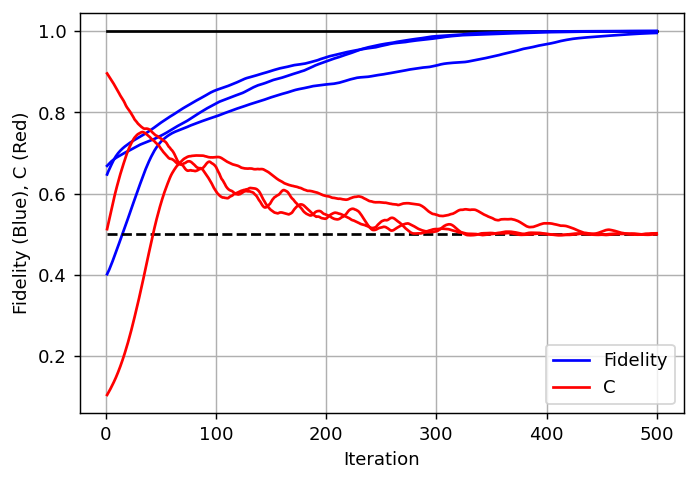

In [36]:
x = list(range(1, 501))
fig=plt.figure(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
plt.plot(x, len(x)*[1], "k-")
plt.plot(x, -np.array(model1.fid_list), "b-", label="Fidelity")
plt.plot(x, -np.array(model2.fid_list), "b-")
plt.plot(x, -np.array(model3.fid_list), "b-")

plt.plot(x, len(x)*[0.5], "k--")
plt.plot(x, model1.c_list, "r-", label="C")
plt.plot(x, model2.c_list, "r-")
plt.plot(x, model3.c_list, "r-")
plt.xlabel("Iteration")
plt.ylabel("Fidelity (Blue), C (Red)")
plt.legend()
plt.grid()
plt.show()

## Overparameterization

In [70]:
n = 3
d = 2**n
rank = 3

input_list = [prepare_input(numberToBase(i, 6, n)) for i in range(6**n)]

np.random.seed(42)
random.seed(42)

X, _, _ = generate_ginibre(d, d)
U = generate_unitary(X)
kraus_target = KrausMap(U, 0.5, d, rank)

target_list = [kraus_target.apply_map(input) for input in input_list]

kraus_model = KrausMap(U, 0.1, d, 63)
#model4 = ModelQuantumMap(q_map = kraus_model,
#                         input_list = input_list,
#                         target_list = target_list,
#                         cost = state_density_loss,
#                         lr = 0.05, 
#                         h = 1e-3)

kraus_model = KrausMap(U, 0.5, d, 63)
model5 = ModelQuantumMap(q_map = kraus_model,
                         input_list = input_list,
                         target_list = target_list,
                         cost = state_density_loss,
                         lr = 0.05, 
                         h = 1e-3)

kraus_model = KrausMap(U, 0.9, d, 63)
model6 = ModelQuantumMap(q_map = kraus_model,
                         input_list = input_list,
                         target_list = target_list,
                         cost = state_density_loss,
                         lr = 0.05, 
                         h = 1e-3)

In [71]:
#model4.train(num_iter = 500, 
#             use_adam = True)

model5.train(num_iter = 500, 
             use_adam = True)

model6.train(num_iter = 500, 
             use_adam = True)

  0%|          | 0/500 [00:00<?, ?it/s]

0: fid: -0.687, c: 0.512
1: fid: -0.691, c: 0.525
2: fid: -0.696, c: 0.537
3: fid: -0.701, c: 0.550
4: fid: -0.705, c: 0.561
5: fid: -0.710, c: 0.573
6: fid: -0.714, c: 0.584
7: fid: -0.717, c: 0.596
8: fid: -0.721, c: 0.606
9: fid: -0.724, c: 0.616
10: fid: -0.727, c: 0.627
11: fid: -0.730, c: 0.637
12: fid: -0.733, c: 0.646
13: fid: -0.736, c: 0.655
14: fid: -0.739, c: 0.664
15: fid: -0.741, c: 0.673
16: fid: -0.743, c: 0.680
17: fid: -0.745, c: 0.688
18: fid: -0.747, c: 0.695
19: fid: -0.749, c: 0.702
20: fid: -0.751, c: 0.708
21: fid: -0.752, c: 0.713
22: fid: -0.754, c: 0.718
23: fid: -0.756, c: 0.722
24: fid: -0.757, c: 0.724
25: fid: -0.758, c: 0.726
26: fid: -0.760, c: 0.727
27: fid: -0.761, c: 0.727
28: fid: -0.763, c: 0.727
29: fid: -0.765, c: 0.726
30: fid: -0.766, c: 0.725
31: fid: -0.768, c: 0.725
32: fid: -0.769, c: 0.725
33: fid: -0.771, c: 0.724
34: fid: -0.773, c: 0.725
35: fid: -0.774, c: 0.724
36: fid: -0.776, c: 0.722
37: fid: -0.778, c: 0.720
38: fid: -0.780, c: 0.

308: fid: -0.998, c: 0.496
309: fid: -0.998, c: 0.496
310: fid: -0.998, c: 0.496
311: fid: -0.998, c: 0.496
312: fid: -0.999, c: 0.497
313: fid: -0.999, c: 0.497
314: fid: -0.999, c: 0.497
315: fid: -0.999, c: 0.497
316: fid: -0.999, c: 0.497
317: fid: -0.999, c: 0.497
318: fid: -0.999, c: 0.497
319: fid: -0.999, c: 0.497
320: fid: -0.999, c: 0.497
321: fid: -0.999, c: 0.497
322: fid: -0.999, c: 0.497
323: fid: -0.999, c: 0.496
324: fid: -0.999, c: 0.496
325: fid: -0.999, c: 0.496
326: fid: -0.999, c: 0.496
327: fid: -0.999, c: 0.495
328: fid: -0.999, c: 0.495
329: fid: -0.999, c: 0.495
330: fid: -0.999, c: 0.495
331: fid: -0.999, c: 0.495
332: fid: -0.999, c: 0.495
333: fid: -0.999, c: 0.495
334: fid: -0.999, c: 0.495
335: fid: -0.999, c: 0.495
336: fid: -0.999, c: 0.495
337: fid: -0.999, c: 0.496
338: fid: -0.999, c: 0.496
339: fid: -0.999, c: 0.496
340: fid: -0.999, c: 0.496
341: fid: -0.999, c: 0.496
342: fid: -0.999, c: 0.496
343: fid: -0.999, c: 0.496
344: fid: -0.999, c: 0.496
3

  0%|          | 0/500 [00:00<?, ?it/s]

0: fid: -0.698, c: 0.895
1: fid: -0.700, c: 0.891
2: fid: -0.703, c: 0.886
3: fid: -0.706, c: 0.881
4: fid: -0.709, c: 0.875
5: fid: -0.712, c: 0.870
6: fid: -0.714, c: 0.864
7: fid: -0.717, c: 0.859
8: fid: -0.720, c: 0.853
9: fid: -0.723, c: 0.847
10: fid: -0.726, c: 0.840
11: fid: -0.729, c: 0.834
12: fid: -0.731, c: 0.827
13: fid: -0.734, c: 0.821
14: fid: -0.737, c: 0.814
15: fid: -0.740, c: 0.807
16: fid: -0.743, c: 0.799
17: fid: -0.745, c: 0.792
18: fid: -0.748, c: 0.785
19: fid: -0.751, c: 0.778
20: fid: -0.753, c: 0.770
21: fid: -0.756, c: 0.762
22: fid: -0.758, c: 0.754
23: fid: -0.761, c: 0.747
24: fid: -0.763, c: 0.738
25: fid: -0.766, c: 0.730
26: fid: -0.768, c: 0.722
27: fid: -0.771, c: 0.714
28: fid: -0.773, c: 0.707
29: fid: -0.775, c: 0.699
30: fid: -0.777, c: 0.691
31: fid: -0.779, c: 0.684
32: fid: -0.781, c: 0.677
33: fid: -0.783, c: 0.671
34: fid: -0.785, c: 0.664
35: fid: -0.787, c: 0.658
36: fid: -0.789, c: 0.653
37: fid: -0.791, c: 0.648
38: fid: -0.794, c: 0.

308: fid: -0.999, c: 0.497
309: fid: -0.999, c: 0.497
310: fid: -0.999, c: 0.497
311: fid: -0.999, c: 0.497
312: fid: -0.999, c: 0.497
313: fid: -0.999, c: 0.497
314: fid: -0.999, c: 0.497
315: fid: -0.999, c: 0.497
316: fid: -0.999, c: 0.497
317: fid: -0.999, c: 0.497
318: fid: -0.999, c: 0.497
319: fid: -0.999, c: 0.497
320: fid: -0.999, c: 0.498
321: fid: -0.999, c: 0.498
322: fid: -0.999, c: 0.498
323: fid: -0.999, c: 0.498
324: fid: -0.999, c: 0.498
325: fid: -0.999, c: 0.498
326: fid: -0.999, c: 0.498
327: fid: -0.999, c: 0.498
328: fid: -0.999, c: 0.498
329: fid: -0.999, c: 0.498
330: fid: -0.999, c: 0.498
331: fid: -0.999, c: 0.498
332: fid: -0.999, c: 0.498
333: fid: -0.999, c: 0.498
334: fid: -1.000, c: 0.498
335: fid: -1.000, c: 0.498
336: fid: -1.000, c: 0.498
337: fid: -1.000, c: 0.497
338: fid: -1.000, c: 0.497
339: fid: -1.000, c: 0.497
340: fid: -1.000, c: 0.497
341: fid: -1.000, c: 0.497
342: fid: -1.000, c: 0.497
343: fid: -1.000, c: 0.497
344: fid: -1.000, c: 0.497
3

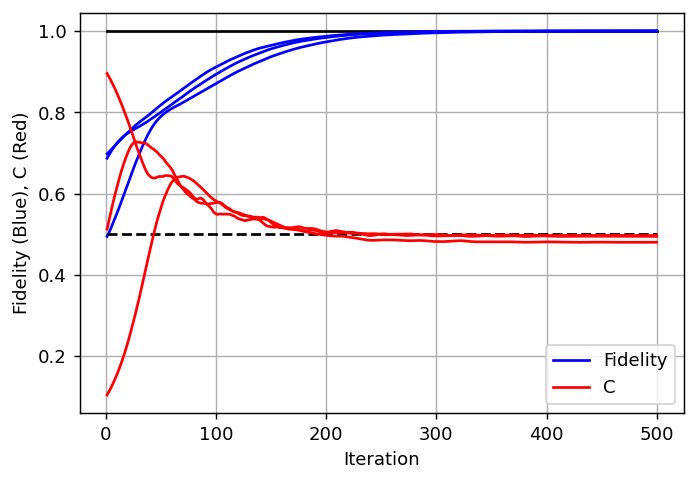

In [72]:
x = list(range(1, 501))
fig=plt.figure(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
plt.plot(x, len(x)*[1], "k-")
plt.plot(x, -np.array(model4.fid_list), "b-", label="Fidelity")
plt.plot(x, -np.array(model5.fid_list), "b-")
plt.plot(x, -np.array(model6.fid_list), "b-")

plt.plot(x, len(x)*[0.5], "k--")
plt.plot(x, model4.c_list, "r-", label="C")
plt.plot(x, model5.c_list, "r-")
plt.plot(x, model6.c_list, "r-")
plt.xlabel("Iteration")
plt.ylabel("Fidelity (Blue), C (Red)")
plt.legend()
plt.grid()
plt.show()

## Under-parameterization

In [43]:
n = 3
d = 2**n
rank = 3

input_list = [prepare_input(numberToBase(i, 6, n)) for i in range(6**n)]

np.random.seed(42)
random.seed(42)

X, _, _ = generate_ginibre(d, d)
U = generate_unitary(X)
kraus_target = KrausMap(U, 0.5, d, rank)

target_list = [kraus_target.apply_map(input) for input in input_list]

kraus_model = KrausMap(U, 0.1, d, 1)
model7 = ModelQuantumMap(q_map = kraus_model,
                         input_list = input_list,
                         target_list = target_list,
                         cost = state_density_loss,
                         lr = 0.05, 
                         h = 1e-3)

kraus_model = KrausMap(U, 0.5, d, 1)
model8 = ModelQuantumMap(q_map = kraus_model,
                         input_list = input_list,
                         target_list = target_list,
                         cost = state_density_loss,
                         lr = 0.05, 
                         h = 1e-3)

kraus_model = KrausMap(U, 0.9, d, 1)
model9 = ModelQuantumMap(q_map = kraus_model,
                         input_list = input_list,
                         target_list = target_list,
                         cost = state_density_loss,
                         lr = 0.05, 
                         h = 1e-3)

In [44]:
model7.train(num_iter = 500, 
             use_adam = True)

model8.train(num_iter = 500, 
             use_adam = True)

model9.train(num_iter = 500, 
             use_adam = True)

  0%|          | 0/500 [00:00<?, ?it/s]

0: fid: -0.278, c: 0.105
1: fid: -0.281, c: 0.109
2: fid: -0.285, c: 0.114
3: fid: -0.289, c: 0.120
4: fid: -0.293, c: 0.125
5: fid: -0.296, c: 0.131
6: fid: -0.301, c: 0.136
7: fid: -0.305, c: 0.142
8: fid: -0.310, c: 0.149
9: fid: -0.316, c: 0.155
10: fid: -0.322, c: 0.162
11: fid: -0.327, c: 0.169
12: fid: -0.332, c: 0.176
13: fid: -0.338, c: 0.184
14: fid: -0.345, c: 0.192
15: fid: -0.352, c: 0.200
16: fid: -0.359, c: 0.208
17: fid: -0.366, c: 0.217
18: fid: -0.373, c: 0.226
19: fid: -0.381, c: 0.236
20: fid: -0.388, c: 0.245
21: fid: -0.396, c: 0.255
22: fid: -0.404, c: 0.265
23: fid: -0.411, c: 0.276
24: fid: -0.419, c: 0.287
25: fid: -0.426, c: 0.298
26: fid: -0.433, c: 0.309
27: fid: -0.440, c: 0.320
28: fid: -0.447, c: 0.332
29: fid: -0.455, c: 0.344
30: fid: -0.462, c: 0.356
31: fid: -0.470, c: 0.368
32: fid: -0.478, c: 0.381
33: fid: -0.486, c: 0.393
34: fid: -0.493, c: 0.406
35: fid: -0.499, c: 0.419
36: fid: -0.506, c: 0.432
37: fid: -0.512, c: 0.445
38: fid: -0.518, c: 0.

309: fid: -0.713, c: 0.765
310: fid: -0.714, c: 0.765
311: fid: -0.714, c: 0.766
312: fid: -0.714, c: 0.766
313: fid: -0.714, c: 0.766
314: fid: -0.713, c: 0.767
315: fid: -0.713, c: 0.767
316: fid: -0.713, c: 0.767
317: fid: -0.712, c: 0.767
318: fid: -0.712, c: 0.766
319: fid: -0.712, c: 0.766
320: fid: -0.712, c: 0.765
321: fid: -0.712, c: 0.765
322: fid: -0.712, c: 0.764
323: fid: -0.713, c: 0.763
324: fid: -0.713, c: 0.763
325: fid: -0.713, c: 0.762
326: fid: -0.714, c: 0.762
327: fid: -0.714, c: 0.762
328: fid: -0.714, c: 0.761
329: fid: -0.714, c: 0.761
330: fid: -0.714, c: 0.761
331: fid: -0.715, c: 0.760
332: fid: -0.715, c: 0.760
333: fid: -0.716, c: 0.760
334: fid: -0.717, c: 0.760
335: fid: -0.717, c: 0.760
336: fid: -0.717, c: 0.760
337: fid: -0.717, c: 0.760
338: fid: -0.717, c: 0.759
339: fid: -0.717, c: 0.758
340: fid: -0.717, c: 0.758
341: fid: -0.717, c: 0.758
342: fid: -0.717, c: 0.758
343: fid: -0.717, c: 0.759
344: fid: -0.717, c: 0.760
345: fid: -0.718, c: 0.761
3

  0%|          | 0/500 [00:00<?, ?it/s]

0: fid: -0.508, c: 0.512
1: fid: -0.514, c: 0.525
2: fid: -0.521, c: 0.537
3: fid: -0.529, c: 0.550
4: fid: -0.537, c: 0.562
5: fid: -0.546, c: 0.574
6: fid: -0.554, c: 0.586
7: fid: -0.561, c: 0.597
8: fid: -0.568, c: 0.609
9: fid: -0.575, c: 0.620
10: fid: -0.581, c: 0.631
11: fid: -0.587, c: 0.642
12: fid: -0.592, c: 0.652
13: fid: -0.597, c: 0.662
14: fid: -0.601, c: 0.671
15: fid: -0.605, c: 0.681
16: fid: -0.608, c: 0.690
17: fid: -0.611, c: 0.699
18: fid: -0.615, c: 0.707
19: fid: -0.617, c: 0.715
20: fid: -0.620, c: 0.723
21: fid: -0.622, c: 0.731
22: fid: -0.625, c: 0.739
23: fid: -0.627, c: 0.746
24: fid: -0.629, c: 0.753
25: fid: -0.631, c: 0.760
26: fid: -0.633, c: 0.766
27: fid: -0.635, c: 0.772
28: fid: -0.636, c: 0.778
29: fid: -0.638, c: 0.783
30: fid: -0.639, c: 0.787
31: fid: -0.640, c: 0.792
32: fid: -0.641, c: 0.797
33: fid: -0.642, c: 0.801
34: fid: -0.642, c: 0.805
35: fid: -0.643, c: 0.809
36: fid: -0.644, c: 0.813
37: fid: -0.645, c: 0.816
38: fid: -0.646, c: 0.

308: fid: -0.717, c: 0.773
309: fid: -0.717, c: 0.773
310: fid: -0.717, c: 0.773
311: fid: -0.717, c: 0.773
312: fid: -0.717, c: 0.772
313: fid: -0.717, c: 0.772
314: fid: -0.717, c: 0.772
315: fid: -0.717, c: 0.771
316: fid: -0.717, c: 0.771
317: fid: -0.718, c: 0.770
318: fid: -0.718, c: 0.769
319: fid: -0.718, c: 0.768
320: fid: -0.718, c: 0.768
321: fid: -0.718, c: 0.766
322: fid: -0.718, c: 0.764
323: fid: -0.718, c: 0.761
324: fid: -0.718, c: 0.758
325: fid: -0.718, c: 0.755
326: fid: -0.718, c: 0.753
327: fid: -0.718, c: 0.749
328: fid: -0.718, c: 0.745
329: fid: -0.718, c: 0.740
330: fid: -0.718, c: 0.737
331: fid: -0.718, c: 0.733
332: fid: -0.718, c: 0.729
333: fid: -0.718, c: 0.726
334: fid: -0.718, c: 0.724
335: fid: -0.718, c: 0.721
336: fid: -0.718, c: 0.720
337: fid: -0.718, c: 0.719
338: fid: -0.717, c: 0.717
339: fid: -0.717, c: 0.716
340: fid: -0.717, c: 0.715
341: fid: -0.717, c: 0.715
342: fid: -0.717, c: 0.716
343: fid: -0.717, c: 0.718
344: fid: -0.717, c: 0.720
3

  0%|          | 0/500 [00:00<?, ?it/s]

0: fid: -0.618, c: 0.895
1: fid: -0.620, c: 0.891
2: fid: -0.621, c: 0.891
3: fid: -0.621, c: 0.889
4: fid: -0.621, c: 0.888
5: fid: -0.621, c: 0.886
6: fid: -0.621, c: 0.883
7: fid: -0.621, c: 0.881
8: fid: -0.621, c: 0.878
9: fid: -0.620, c: 0.876
10: fid: -0.620, c: 0.874
11: fid: -0.622, c: 0.872
12: fid: -0.624, c: 0.872
13: fid: -0.625, c: 0.872
14: fid: -0.625, c: 0.874
15: fid: -0.626, c: 0.875
16: fid: -0.626, c: 0.875
17: fid: -0.627, c: 0.874
18: fid: -0.627, c: 0.873
19: fid: -0.628, c: 0.870
20: fid: -0.628, c: 0.868
21: fid: -0.629, c: 0.867
22: fid: -0.630, c: 0.868
23: fid: -0.631, c: 0.869
24: fid: -0.632, c: 0.870
25: fid: -0.633, c: 0.872
26: fid: -0.633, c: 0.874
27: fid: -0.634, c: 0.875
28: fid: -0.634, c: 0.876
29: fid: -0.634, c: 0.877
30: fid: -0.635, c: 0.878
31: fid: -0.635, c: 0.879
32: fid: -0.636, c: 0.881
33: fid: -0.636, c: 0.881
34: fid: -0.636, c: 0.882
35: fid: -0.637, c: 0.883
36: fid: -0.637, c: 0.884
37: fid: -0.637, c: 0.884
38: fid: -0.638, c: 0.

308: fid: -0.733, c: 0.726
309: fid: -0.733, c: 0.725
310: fid: -0.732, c: 0.724
311: fid: -0.732, c: 0.722
312: fid: -0.732, c: 0.721
313: fid: -0.731, c: 0.721
314: fid: -0.731, c: 0.721
315: fid: -0.731, c: 0.722
316: fid: -0.731, c: 0.722
317: fid: -0.730, c: 0.722
318: fid: -0.730, c: 0.723
319: fid: -0.731, c: 0.724
320: fid: -0.731, c: 0.725
321: fid: -0.731, c: 0.725
322: fid: -0.731, c: 0.724
323: fid: -0.731, c: 0.722
324: fid: -0.731, c: 0.721
325: fid: -0.732, c: 0.720
326: fid: -0.732, c: 0.722
327: fid: -0.733, c: 0.723
328: fid: -0.733, c: 0.722
329: fid: -0.733, c: 0.722
330: fid: -0.734, c: 0.722
331: fid: -0.734, c: 0.721
332: fid: -0.735, c: 0.721
333: fid: -0.735, c: 0.722
334: fid: -0.735, c: 0.724
335: fid: -0.736, c: 0.725
336: fid: -0.736, c: 0.725
337: fid: -0.736, c: 0.726
338: fid: -0.737, c: 0.728
339: fid: -0.737, c: 0.730
340: fid: -0.737, c: 0.730
341: fid: -0.737, c: 0.730
342: fid: -0.737, c: 0.732
343: fid: -0.737, c: 0.733
344: fid: -0.737, c: 0.734
3

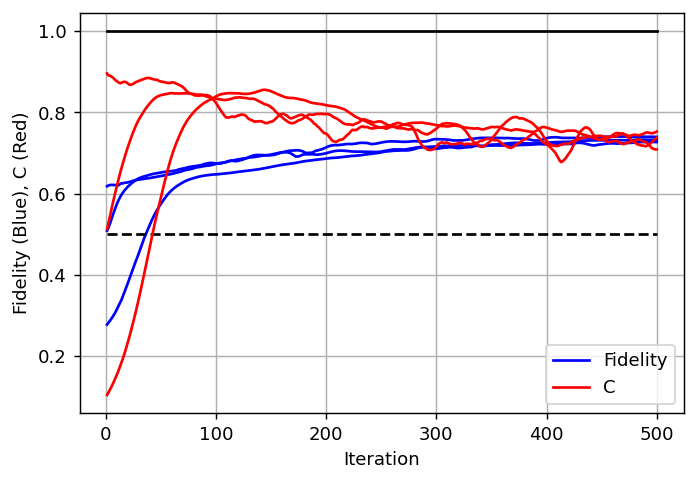

In [48]:
x = list(range(1, 501))
fig=plt.figure(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
plt.plot(x, len(x)*[1], "k-")
plt.plot(x, -np.array(model7.fid_list), "b-", label="Fidelity")
plt.plot(x, -np.array(model8.fid_list), "b-")
plt.plot(x, -np.array(model9.fid_list), "b-")

plt.plot(x, len(x)*[0.5], "k--")
plt.plot(x, model7.c_list, "r-", label="C")
plt.plot(x, model8.c_list, "r-")
plt.plot(x, model9.c_list, "r-")
plt.xlabel("Iteration")
plt.ylabel("Fidelity (Blue), C (Red)")
plt.legend()
plt.grid()
plt.show()

## Sparse Input
### Low Rank

In [75]:
n = 3
d = 2**n
rank = 2

state_input_list = [prepare_input(numberToBase(i, 6, n)) for i in range(6**n)]

np.random.seed(42)
random.seed(42)

X, _, _ = generate_ginibre(d, d)
U = generate_unitary(X) # Random unitary part
kraus_target = KrausMap(U, 0.5, d, rank)
choi_target = maps_to_choi([kraus_target])

target_list = [kraus_target.apply_map(input) for input in input_list]

target_list = list(zip(input_list, target_list))
random.shuffle(target_list)
input_list, target_list = zip(*target_list)

In [76]:
#num_inputs_list = [216, 182, 153, 128, 108, 91, 76, 64, 54, 45, 38, 32, 27, 23, 19, 16, 14, 11, 10]
num_inputs_list = [100, 50, 25, 10, 5]

map_fidelity_list1_1 = []
map_fidelity_list1_2 = []

for num_inputs in num_inputs_list:
    kraus_model1 = KrausMap(U, 0.9, d, rank)
    model1 = ModelQuantumMap(q_map = kraus_model1,
                             input_list = input_list[:num_inputs],
                             target_list = target_list[:num_inputs],
                             cost = state_density_loss,
                             lr = 0.05, 
                             h = 1e-3)
    
    model1.train(num_iter = 500, 
                 use_adam = True,
                 verbose = False)
    
    kraus_model2 = KrausMap(d=d, rank = rank + 1)
    model2 = ModelQuantumMap(q_map = kraus_model2,
                             input_list = input_list[:num_inputs],
                             target_list = target_list[:num_inputs],
                             cost = state_density_loss,
                             lr = 0.05, 
                             h = 1e-3)
    
    model2.train(num_iter = 500, 
                 use_adam = True,
                 verbose = False)
    
    map_fidelity_list1_1.append(channel_fidelity(kraus_target, kraus_model1))
    map_fidelity_list1_2.append(channel_fidelity(kraus_target, kraus_model2))
    print(map_fidelity_list1_1[-1], map_fidelity_list1_2[-1])

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.9990360077303897 0.9998311745910603


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.9999489945737582 0.998334303699696


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.9999297870527023 0.9581653291765136


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.7037955417640839 0.41823724529789086


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.608050543603644 0.24733171217180577


### Medium Rank

In [79]:
n = 3
d = 2**n
rank = 4

state_input_list = [prepare_input(numberToBase(i, 6, n)) for i in range(6**n)]

np.random.seed(42)
random.seed(42)

X, _, _ = generate_ginibre(d, d)
U = generate_unitary(X) # Random unitary part
kraus_target = KrausMap(U, 0.5, d, rank)
choi_target = maps_to_choi([kraus_target])

target_list = [kraus_target.apply_map(input) for input in input_list]

target_list = list(zip(input_list, target_list))
random.shuffle(target_list)
input_list, target_list = zip(*target_list)

In [80]:
#num_inputs_list = [216, 182, 153, 128, 108, 91, 76, 64, 54, 45, 38, 32, 27, 23, 19, 16, 14, 11, 10]
num_inputs_list = [100, 50, 25, 10, 5]

map_fidelity_list2_1 = []
map_fidelity_list2_2 = []

for num_inputs in num_inputs_list:
    kraus_model1 = KrausMap(U, 0.9, d, rank)
    model1 = ModelQuantumMap(q_map = kraus_model1,
                             input_list = input_list[:num_inputs],
                             target_list = target_list[:num_inputs],
                             cost = state_density_loss,
                             lr = 0.05, 
                             h = 1e-3)
    
    model1.train(num_iter = 500, 
                 use_adam = True,
                 verbose = False)
    
    kraus_model2 = KrausMap(d=d, rank = rank + 1)
    model2 = ModelQuantumMap(q_map = kraus_model2,
                             input_list = input_list[:num_inputs],
                             target_list = target_list[:num_inputs],
                             cost = state_density_loss,
                             lr = 0.05, 
                             h = 1e-3)
    
    model2.train(num_iter = 500, 
                 use_adam = True,
                 verbose = False)
    
    map_fidelity_list2_1.append(channel_fidelity(kraus_target, kraus_model1))
    map_fidelity_list2_2.append(channel_fidelity(kraus_target, kraus_model2))
    print(map_fidelity_list2_1[-1], map_fidelity_list2_2[-1])

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.999892683718425 0.9983978889906555


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.9997978541371297 0.9733821329585193


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.9412070131657063 0.7724656500149238


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.6679624036047807 0.45948783795110065


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.4902760582088269 0.1909381731872311


In [81]:
n = 3
d = 2**n
rank = 8

state_input_list = [prepare_input(numberToBase(i, 6, n)) for i in range(6**n)]

np.random.seed(42)
random.seed(42)

X, _, _ = generate_ginibre(d, d)
U = generate_unitary(X) # Random unitary part
kraus_target = KrausMap(U, 0.5, d, rank)
choi_target = maps_to_choi([kraus_target])

target_list = [kraus_target.apply_map(input) for input in input_list]

target_list = list(zip(input_list, target_list))
random.shuffle(target_list)
input_list, target_list = zip(*target_list)

In [82]:
#num_inputs_list = [216, 182, 153, 128, 108, 91, 76, 64, 54, 45, 38, 32, 27, 23, 19, 16, 14, 11, 10]
num_inputs_list = [100, 50, 25, 10, 5]

map_fidelity_list3_1 = []
map_fidelity_list3_2 = []

for num_inputs in num_inputs_list:
    kraus_model1 = KrausMap(U, 0.9, d, rank)
    model1 = ModelQuantumMap(q_map = kraus_model1,
                             input_list = input_list[:num_inputs],
                             target_list = target_list[:num_inputs],
                             cost = state_density_loss,
                             lr = 0.05, 
                             h = 1e-3)
    
    model1.train(num_iter = 500, 
                 use_adam = True,
                 verbose = False)
    
    kraus_model2 = KrausMap(d=d, rank = rank + 1)
    model2 = ModelQuantumMap(q_map = kraus_model2,
                             input_list = input_list[:num_inputs],
                             target_list = target_list[:num_inputs],
                             cost = state_density_loss,
                             lr = 0.05, 
                             h = 1e-3)
    
    model2.train(num_iter = 500, 
                 use_adam = True,
                 verbose = False)
    
    map_fidelity_list3_1.append(channel_fidelity(kraus_target, kraus_model1))
    map_fidelity_list3_2.append(channel_fidelity(kraus_target, kraus_model2))
    print(map_fidelity_list3_1[-1], map_fidelity_list3_2[-1])

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.953224302190264 0.9600160607111728


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.8930866186072 0.8876011092618619


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.8203143963315674 0.7118329452024639


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.597434885563985 0.423761054767596


  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

0.5391035715813591 0.19989378373320563


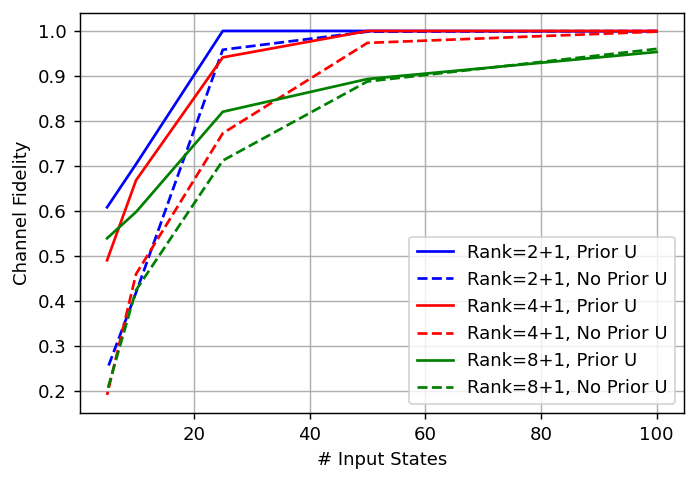

In [85]:
fig=plt.figure(figsize=(6,4), dpi = 130, facecolor='w', edgecolor='k')
plt.plot(num_inputs_list, map_fidelity_list1_1, "b-", label="Rank=2+1, Prior U")
plt.plot(num_inputs_list, map_fidelity_list1_2, "b--",label="Rank=2+1, No Prior U")
plt.plot(num_inputs_list, map_fidelity_list2_1, "r-", label="Rank=4+1, Prior U")
plt.plot(num_inputs_list, map_fidelity_list2_2, "r--",label="Rank=4+1, No Prior U")
plt.plot(num_inputs_list, map_fidelity_list3_1, "g-", label="Rank=8+1, Prior U")
plt.plot(num_inputs_list, map_fidelity_list3_2, "g--",label="Rank=8+1, No Prior U")
plt.legend()
plt.xlabel("# Input States")
plt.ylabel("Channel Fidelity")
plt.grid()
plt.show()

In [2]:
def qft(n):
    circuit = qk.QuantumCircuit(n)
    for i in range(n):
        circuit.h(i)
        for j in range(i+1, n):
            circuit.cp(2*np.pi/2**(j-i+1), j, i)
            
    return circuit

In [113]:
n = 2
d = 2**n
rank = 4

np.random.seed(42)
random.seed(42)

corr_mat = np.array([[0.91, 0.06, 0.09, 0.12], [0.03, 0.82, 0.09, 0.12], [0.03, 0.06, 0.73, 0.12], [0.03, 0.06, 0.09, 0.64]])
povm = corr_mat_to_povm(corr_mat)
povm_T = corr_mat_to_povm(corr_mat.T)
print(sum(povm))
print(sum(povm_ideal(n)))


G, _, _ = generate_ginibre(d,d)
U = generate_unitary(G)
kraus_target = KrausMap(U=U,
                        c = 0.8,
                        d=d, 
                        rank=rank)

N = 6*6*(4*4-1)
state_index, observ_index = index_generator(n, N, trace=True)

input_list = []
circuit_list = []
for i, j in zip(state_index, observ_index):

    config = numberToBase(i, 6, n)
    state = prepare_input(config, return_mode = "density")

    config = numberToBase(j, 4, n)
    U_basis, observable = pauli_observable(config, return_mode = "unitary")
    
    input_list.append([state, U_basis, observable])

target_list = []
for i in range(N):
    state, U_basis, observable = input_list[i]
    state = kraus_target.apply_map(state)
    probs = measurement(state, U_basis=U_basis, povm=povm)
    target = expectation_value(probs, observable)
    target_list.append(target)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [114]:
input_list, input_val_list = input_list[:N-20], input_list[N-20:]
target_list, target_val_list = target_list[:N-20], target_list[N-20:]

kraus_model = KrausMap(
                       U=U, 
                       c=0.9, 
                       d=d, 
                       rank=rank, 
                       povm=povm,
                      )
model = ModelQuantumMap(q_map = kraus_model,
                        input_list = input_list,
                        target_list = target_list,
                        input_val_list = input_val_list,
                        target_val_list = target_val_list,
                        cost = expectation_value_loss,
                        lr = 0.05, 
                        h = 1e-3)

In [121]:
model.train(num_iter = 100, 
            use_adam = True,
            N = 20)

  0%|          | 0/100 [00:00<?, ?it/s]

0: fid: 0.00034, c: 0.805
1: fid: 0.00035, c: 0.804
2: fid: 0.00036, c: 0.804
3: fid: 0.00036, c: 0.804
4: fid: 0.00036, c: 0.803
5: fid: 0.00036, c: 0.803
6: fid: 0.00036, c: 0.804
7: fid: 0.00035, c: 0.804
8: fid: 0.00035, c: 0.804
9: fid: 0.00034, c: 0.804
10: fid: 0.00034, c: 0.804
11: fid: 0.00032, c: 0.805
12: fid: 0.00032, c: 0.806
13: fid: 0.00030, c: 0.807
14: fid: 0.00029, c: 0.808
15: fid: 0.00028, c: 0.809
16: fid: 0.00027, c: 0.811
17: fid: 0.00026, c: 0.811
18: fid: 0.00025, c: 0.812
19: fid: 0.00024, c: 0.812
20: fid: 0.00023, c: 0.812
21: fid: 0.00023, c: 0.813
22: fid: 0.00022, c: 0.812
23: fid: 0.00022, c: 0.812
24: fid: 0.00022, c: 0.811
25: fid: 0.00021, c: 0.810
26: fid: 0.00021, c: 0.809
27: fid: 0.00021, c: 0.809
28: fid: 0.00020, c: 0.808
29: fid: 0.00020, c: 0.808
30: fid: 0.00020, c: 0.808
31: fid: 0.00019, c: 0.808
32: fid: 0.00019, c: 0.807
33: fid: 0.00019, c: 0.807
34: fid: 0.00019, c: 0.806
35: fid: 0.00019, c: 0.806
36: fid: 0.00019, c: 0.805
37: fid: 0.

In [15]:
channel_fidelity([kraus_model], [kraus_target])

NameError: name 'kraus_model' is not defined

In [7]:
state = np.array([[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]])

In [12]:
obs = parity_observable(2, trace_index_list=[0])
probs = measurement(state, povm=povm_ideal(2))
print(expectation_value(probs, obs))

0.0


In [44]:
circuit = qk.QuantumCircuit(2)
circuit.x(1)

print(circuit)
U = Operator(circuit.reverse_bits()).data
print(U)
#print(DensityMatrix(circuit.reverse_bits()).data)
state = np.zeros((4,4))
state[0,0] = 1
print(np.abs(U@state@U.T.conj()))

          
q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘
[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [43]:
I = np.eye(2)
X = np.array([[0,1], [1, 0]])
Z = np.array([[1,0], [0, -1]])
U1 = np.kron(I, X)

print(U1)
print(U1@state@U1.T)

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
print()